Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


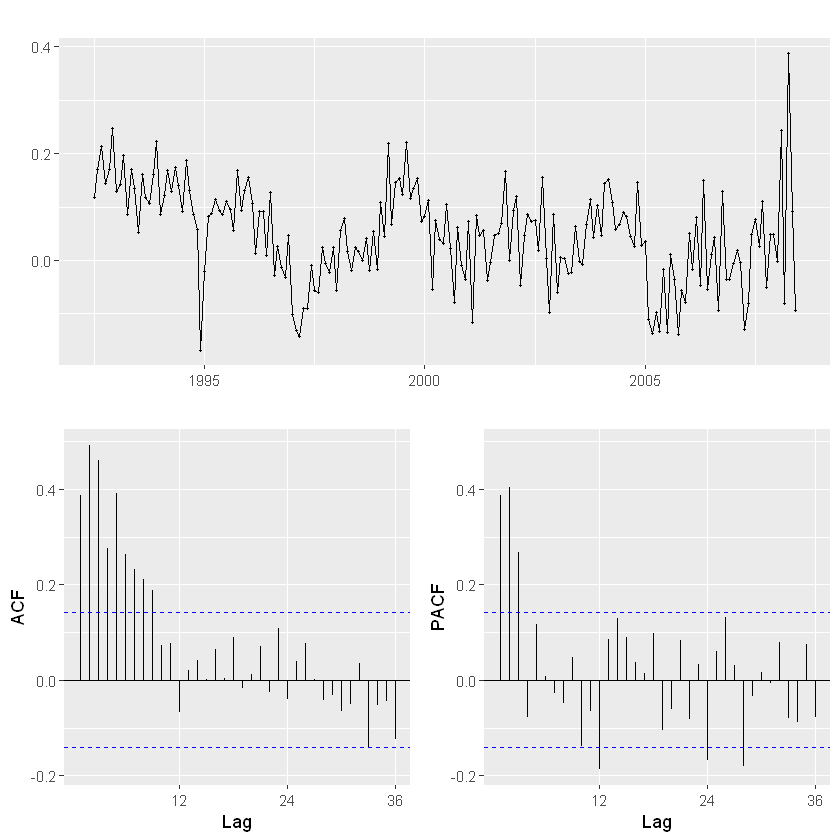

In [1]:
library(forecast)
library(fpp2)

# 로그 치환
lh02 <- log(h02)

# 계절 차분
dlh02 <- diff(lh02,lag=12)

ggtsdisplay(dlh02)

PACF 12번째 24번째 튀는 부분 보이시죠? 
ACF에서는 지수적으로 감소하는 것이 얼추 보일 거고,
코렐로그램만 보았을 때는 ARIMA(3,0,0),(2,1,0) 같아요

Series: h02 
ARIMA(3,0,1)(0,1,2)[12] 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1     ar2     ar3     ma1     sma1     sma2
      -0.1603  0.5481  0.5678  0.3827  -0.5222  -0.1768
s.e.   0.1636  0.0878  0.0942  0.1895   0.0861   0.0872

sigma^2 estimated as 0.004278:  log likelihood=250.04
AIC=-486.08   AICc=-485.48   BIC=-463.28


	Ljung-Box test

data:  Residuals from ARIMA(3,0,1)(0,1,2)[12]
Q* = 50.712, df = 30, p-value = 0.01045

Model df: 6.   Total lags used: 36



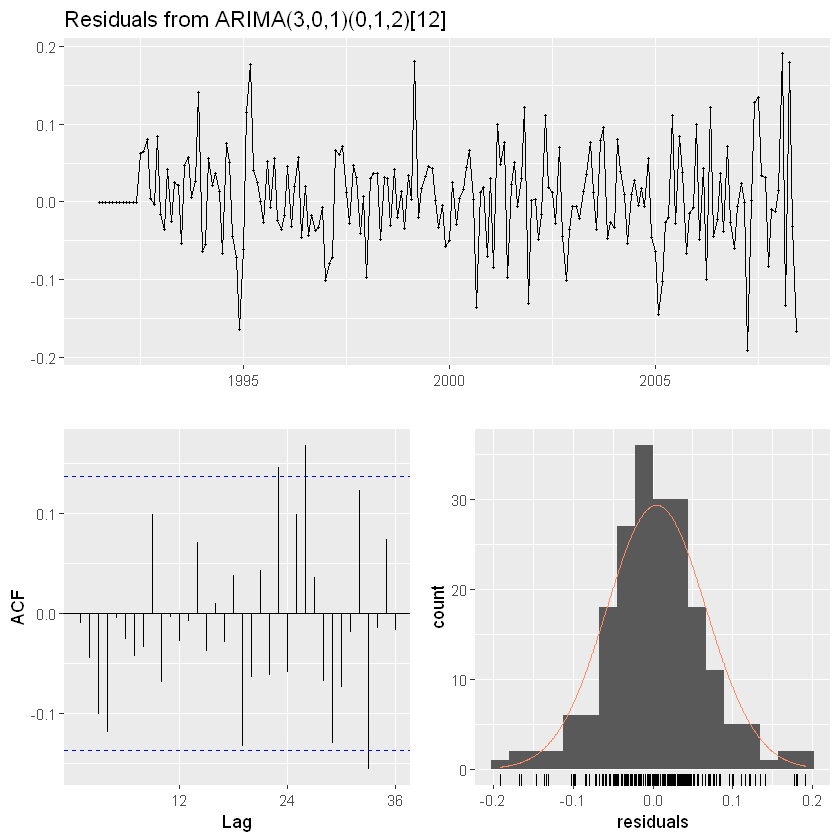

In [2]:
library(ggplot2)

m_1 <- Arima(h02, order=c(3,0,1), seasonal=c(0,1,2), lambda=0)
m_1
checkresiduals(m_1,lag=36)

람다를 0으로 두면 로그 차분이 들어간 것입니다.<br/>
lag12였으니까 36까지 한번 확인해본 겁니다.<br/>

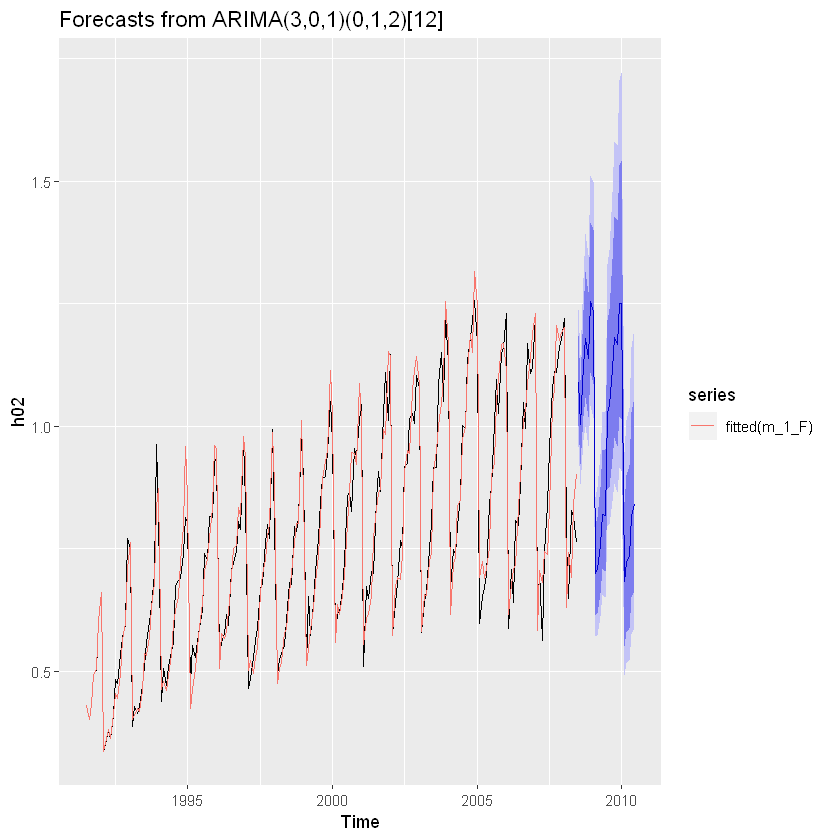

In [3]:
m_1_F <- forecast(m_1, h=24)
autoplot(m_1_F)+autolayer(fitted(m_1_F))


	Ljung-Box test

data:  Residuals from ARIMA(4,1,1)(0,1,2)[12]
Q* = 54.62, df = 29, p-value = 0.002743

Model df: 7.   Total lags used: 36



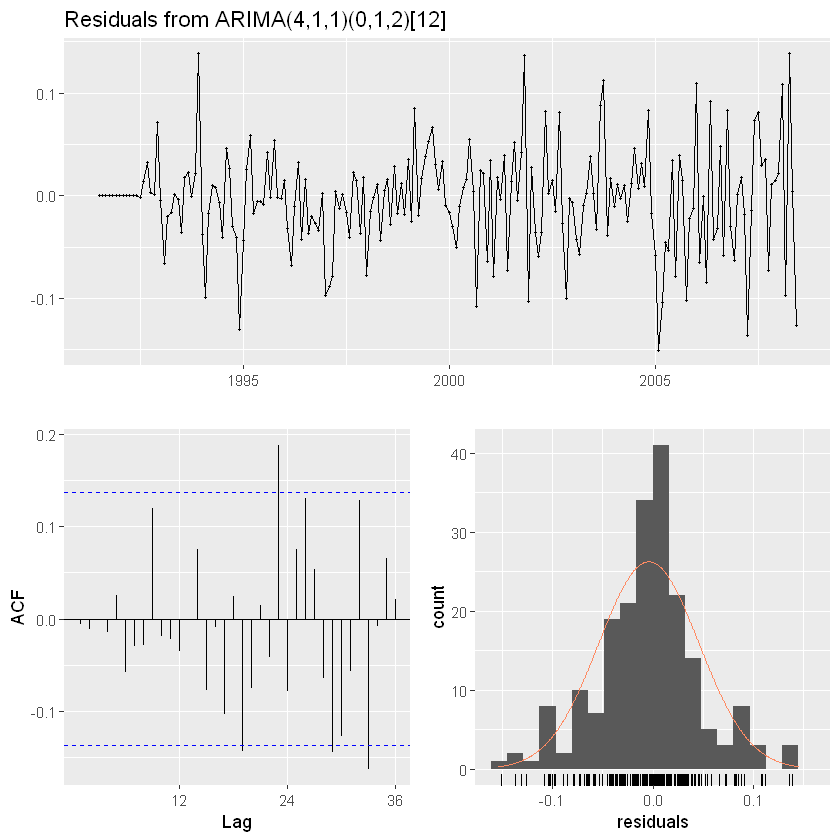

In [9]:
auto <- auto.arima(h02)
checkresiduals(auto, lag=36)

차수가 너무높네요 ..!

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1991,,,,,,,0.4295469,0.4008174,0.4320746,0.4924268,0.5022674,0.6024752
1992,0.6599141,0.3363451,0.3514449,0.3798681,0.3618728,0.4108159,0.4847196,0.4620982,0.5026700,0.5652806,0.5939903,0.6995549
1993,0.7565617,0.4540809,0.4479660,0.4299264,0.4272305,0.4733674,0.5450436,0.5407234,0.5793993,0.6334181,0.6778819,0.8245228
1994,0.8569827,0.5373250,0.5236588,0.4601596,0.5028641,0.5472691,0.5986744,0.6272712,0.6592860,0.7195786,0.7816051,0.9437519
1995,0.8467825,0.4502334,0.4943398,0.5441514,0.5672633,0.5947018,0.6313156,0.6986328,0.7275438,0.7621356,0.8160261,0.9297515
1996,0.9226023,0.5603387,0.6276379,0.5887651,0.5829349,0.6372520,0.6922904,0.7564467,0.7642164,0.8319036,0.8220695,0.9688696
1997,0.9445411,0.5524940,0.5636939,0.5235439,0.5747256,0.5869767,0.6858956,0.7191262,0.7405556,0.7848844,0.8068941,0.9763562
1998,0.8783323,0.5056180,0.5265539,0.5256699,0.5957353,0.5980309,0.6650451,0.7064670,0.7662135,0.8022683,0.8012337,0.9957227
1999,0.8575955,0.5378506,0.5680000,0.5935923,0.6228789,0.6659541,0.7181494,0.7801348,0.8626044,0.8917550,0.9137151,1.0603388
2000,0.9861506,0.6036204,0.6686290,0.6297726,0.6567854,0.7107929,0.8013661,0.8623864,0.9334755,0.9310604,0.9173259,1.0774973


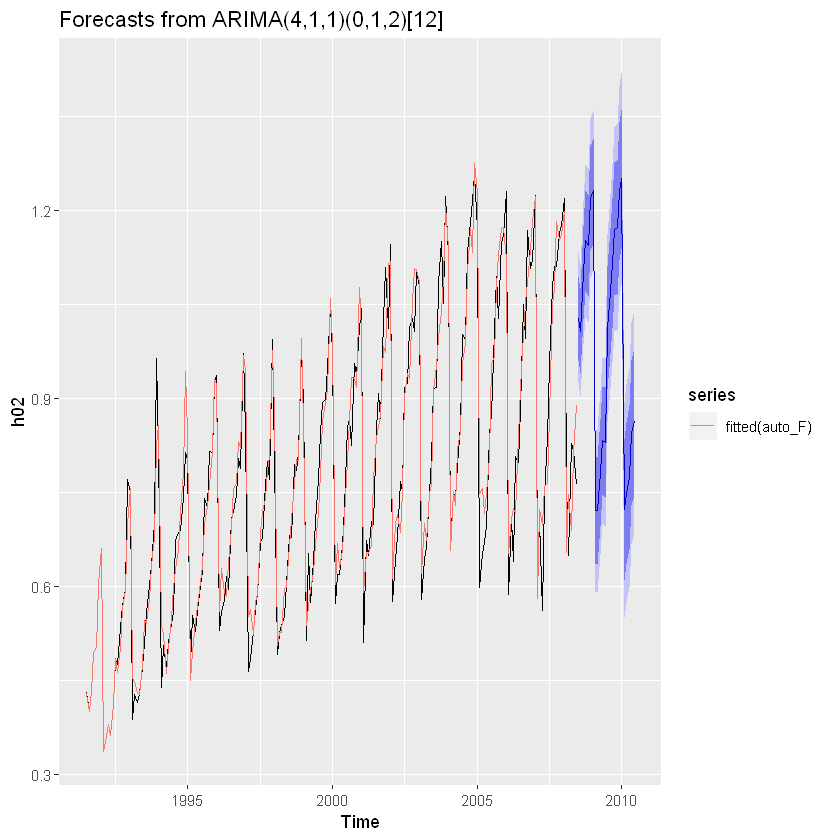

In [10]:
library(stats)
auto_F<-forecast(auto, h=24)
fitted(auto_F)
autoplot(auto_F) + autolayer(fitted(auto_F))